##  Sau khi cài đặt, tiến hành import các thư viện cần thiết: mlxtend, xlrd, openpyxl

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

## Sử dụng pandas để đọc tập tin dữ liệu với định dạng *.xlsx 

In [7]:
df = pd.read_excel('Online Retail.xlsx')

## Sau khi dữ liệu được đọc vào biến df, hiển thị một vài thông tin của biến này

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [6]:
df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom


## Thực hiện các thao tác: cắt bỏ các ký tự thừa ở tên mặt hàng mua (cột Description), 
xóa các dòng dữ liệu không có số hóa đơn (cột InvoiceNo) và chuyển nó về kiểu d 
liệu chuỗi.


In [8]:
df['Description']=df['Description'].str.strip() 
df.dropna(axis=0,subset=['InvoiceNo'],inplace=True)
df['InvoiceNo']=df['InvoiceNo'].astype('str')

## Xem thử 10 dòng đầu của dữ liệu sau khi đã thực hiện các thao tác “làm sạch”

In [9]:
df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom


##  Có thể xem một ví dụ về loại hóa đơn tín dụng bằng câu lệnh như sau

In [10]:
df[df.InvoiceNo.str.contains('C', na=False)].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom


## Tiến hành xóa những hóa đơn tín dụng

In [11]:
df=df[~df['InvoiceNo'].str.contains('C')]

## Thống kê số dòng dữ liệu theo từng quốc gia, bằng câu lệnh sau

<Axes: ylabel='Country'>

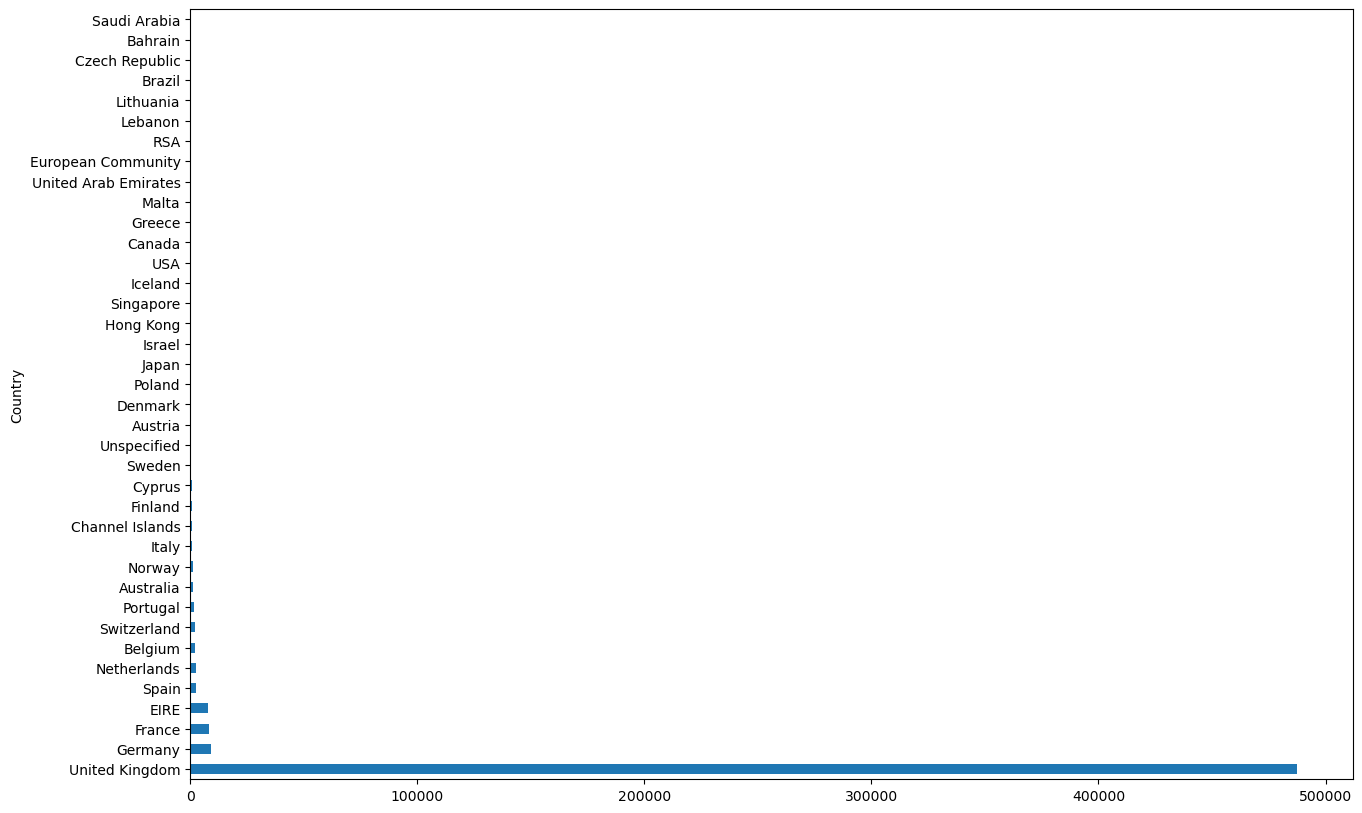

In [12]:
df['Country'].value_counts().plot(kind='barh', figsize=(15,10))

## Kết quả được thể hiện bằng biểu đồ

##  Chỉ xét các hóa đơn từ nước Anh và nhóm dữ liệu theo Số hóa đơn và Tên mặt hàng 

In [13]:
basket = df[df['Country']=="United Kingdom"].groupby(['InvoiceNo','Description'])['Quantity']

##  Chỉ xét các hóa đơn từ nước Anh và nhóm dữ liệu theo Số hóa đơn và Tên mặt hàng

In [14]:
basket = basket.sum().unstack().reset_index().fillna(0).set_index('InvoiceNo')

## Xem dữ liệu sau khi chuyển về dạng hot encoding

In [15]:
basket.head(10)

Description,*Boombox Ipod Classic,*USB Office Mirror Ball,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 DAISY PEGS IN WOOD BOX,12 EGG HOUSE PAINTED WOOD,12 HANGING EGGS HAND PAINTED,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,...,wrongly coded 20713,wrongly coded 23343,wrongly coded-23343,wrongly marked,wrongly marked 23343,wrongly marked carton 22804,wrongly marked. 23343 in box,wrongly sold (22719) barcode,wrongly sold as sets,wrongly sold sets
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536365,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536366,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536367,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536368,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536369,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536371,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536372,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536373,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536374,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Tạo hàm biến đổi mỗi điểm dữ liệu có số lượng (Quantity) lớn hơn 0 thành 1

In [16]:
def encode_data(datapoint):
    if datapoint <= 0:
        return 0
    if datapoint >= 1:
        return 1

## Chuyển đổi dữ liệu từ dạng hot encoding thành one-hot encoding 

In [17]:
basket = basket.applymap(encode_data)

C:\Users\tento\AppData\Local\Temp\ipykernel_2856\1901855995.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  basket = basket.applymap(encode_data)


##  Xóa cột ‘POSTAGE’

In [18]:
basket.drop('POSTAGE', inplace=True, axis=1)

## Áp dụng thuật toán Apriori với min_sup = 3% để tìm tập phổ biến

In [19]:
itemsets = apriori(basket.astype('bool'),min_support=0.03,use_colnames=True)

## Xem 10 phần tử đầu tiên trong tập phổ biến tìm được

In [20]:
itemsets.head(10)

,support,itemsets
0,0.045803,(6 RIBBONS RUSTIC CHARM)
1,0.031124,(60 CAKE CASES VINTAGE CHRISTMAS)
2,0.040339,(60 TEATIME FAIRY CAKE CASES)
3,0.046928,(ALARM CLOCK BAKELIKE GREEN)
4,0.035142,(ALARM CLOCK BAKELIKE PINK)
5,0.049821,(ALARM CLOCK BAKELIKE RED)
6,0.036214,(ANTIQUE SILVER T-LIGHT GLASS)
7,0.073445,(ASSORTED COLOUR BIRD ORNAMENT)
8,0.042267,(BAKING SET 9 PIECE RETROSPOT)
9,0.035089,(BATHROOM METAL SIGN)


## Tạo luật kết hợp với min_conf = 50%

In [21]:
rules = association_rules(itemsets, metric="confidence", min_threshold=0.5)

## Xem thông tin về tập luật

In [22]:
rules.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   antecedents         10 non-null     object 
 1   consequents         10 non-null     object 
 2   antecedent support  10 non-null     float64
 3   consequent support  10 non-null     float64
 4   support             10 non-null     float64
 5   confidence          10 non-null     float64
 6   lift                10 non-null     float64
 7   leverage            10 non-null     float64
 8   conviction          10 non-null     float64
 9   zhangs_metric       10 non-null     float64
dtypes: float64(8), object(2)
memory usage: 932.0+ bytes


## Chuyển đổi vế trái và vế phải từ kiểu object (frozenset) về kiểu chuỗi (unicode)

In [23]:
rules["antecedents"]=rules["antecedents"].apply(lambda x:list(x)[0]).astype("unicode")
rules["consequents"]=rules["consequents"].apply(lambda x:list(x)[0]).astype("unicode")

## Viết lệnh in ra các luật đã tìm được 

In [24]:
for i in range(len(rules)):
    print(rules.loc[i, 'antecedents'], ' ==> ', rules.loc[i, 'consequents'],
          ' [', rules.loc[i, 'support'], ', ', rules.loc[i, 'confidence'], ']')

ALARM CLOCK BAKELIKE RED  ==>  ALARM CLOCK BAKELIKE GREEN  [ 0.030160175711148016 ,  0.6053763440860216 ]
ALARM CLOCK BAKELIKE GREEN  ==>  ALARM CLOCK BAKELIKE RED  [ 0.030160175711148016 ,  0.6426940639269406 ]
GREEN REGENCY TEACUP AND SAUCER  ==>  PINK REGENCY TEACUP AND SAUCER  [ 0.030910162318530027 ,  0.6177730192719486 ]
PINK REGENCY TEACUP AND SAUCER  ==>  GREEN REGENCY TEACUP AND SAUCER  [ 0.030910162318530027 ,  0.8207681365576103 ]
GREEN REGENCY TEACUP AND SAUCER  ==>  ROSES REGENCY TEACUP AND SAUCER  [ 0.03755290084105641 ,  0.7505353319057816 ]
ROSES REGENCY TEACUP AND SAUCER  ==>  GREEN REGENCY TEACUP AND SAUCER  [ 0.03755290084105641 ,  0.7324973876698014 ]
JUMBO  BAG BAROQUE BLACK WHITE  ==>  JUMBO BAG RED RETROSPOT  [ 0.03053516901483902 ,  0.6263736263736264 ]
JUMBO BAG PINK POLKADOT  ==>  JUMBO BAG RED RETROSPOT  [ 0.042052820485348474 ,  0.6773080241587576 ]
JUMBO SHOPPER VINTAGE RED PAISLEY  ==>  JUMBO BAG RED RETROSPOT  [ 0.03519580007499866 ,  0.5798764342453663 ]

## Lấy giá trị độ hỗ trợ và độ tin cậy của tập luật

In [25]:
support = rules['support'].values
confidence = rules['confidence'].values

## Biểu diễn các thông tin này lên biểu đồ


<Axes: title={'center': 'Assocation Rules'}, xlabel='support', ylabel='confidence'>

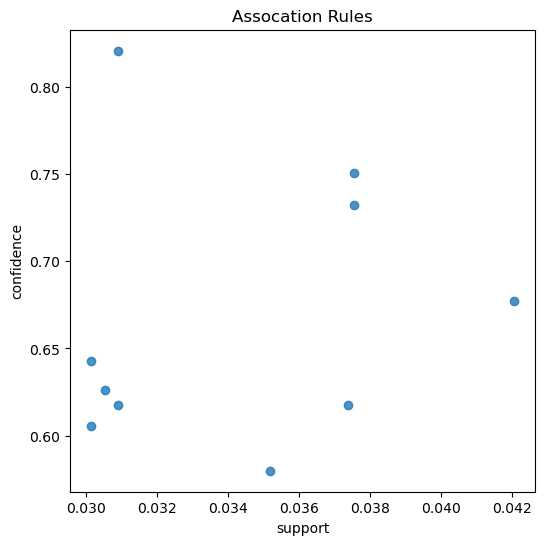

In [26]:
plt.figure(figsize=(6,6))
plt.title('Assocation Rules')
plt.xlabel('support')
plt.ylabel('confidence')
sns.regplot(x=support,y=confidence, fit_reg=False)

## Import module fpgrowth từ thư viện mlxtend và thực hiện tìm tập phổ biến bằng 
thuật toán FP-Growt và làm tương tựh

In [27]:
from mlxtend.frequent_patterns import fpgrowth
itemsets = fpgrowth(basket.astype('bool'), min_support=0.03, use_colnames=True)

In [28]:
rules = association_rules(itemsets, metric="confidence", min_threshold=0.5)

In [29]:
rules.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   antecedents         10 non-null     object 
 1   consequents         10 non-null     object 
 2   antecedent support  10 non-null     float64
 3   consequent support  10 non-null     float64
 4   support             10 non-null     float64
 5   confidence          10 non-null     float64
 6   lift                10 non-null     float64
 7   leverage            10 non-null     float64
 8   conviction          10 non-null     float64
 9   zhangs_metric       10 non-null     float64
dtypes: float64(8), object(2)
memory usage: 932.0+ bytes


In [30]:
rules["antecedents"]=rules["antecedents"].apply(lambda x:list(x)[0]).astype("unicode")
rules["consequents"]=rules["consequents"].apply(lambda x:list(x)[0]).astype("unicode")

In [31]:
for i in range(len(rules)):
    print(rules.loc[i, 'antecedents'], ' ==> ', rules.loc[i, 'consequents'],
          ' [', rules.loc[i, 'support'], ', ', rules.loc[i, 'confidence'], ']')

JUMBO BAG PINK POLKADOT  ==>  JUMBO BAG RED RETROSPOT  [ 0.042052820485348474 ,  0.6773080241587576 ]
JUMBO STORAGE BAG SUKI  ==>  JUMBO BAG RED RETROSPOT  [ 0.037392189425188835 ,  0.6176991150442478 ]
JUMBO  BAG BAROQUE BLACK WHITE  ==>  JUMBO BAG RED RETROSPOT  [ 0.03053516901483902 ,  0.6263736263736264 ]
JUMBO SHOPPER VINTAGE RED PAISLEY  ==>  JUMBO BAG RED RETROSPOT  [ 0.03519580007499866 ,  0.5798764342453663 ]
ALARM CLOCK BAKELIKE RED  ==>  ALARM CLOCK BAKELIKE GREEN  [ 0.030160175711148016 ,  0.6053763440860216 ]
ALARM CLOCK BAKELIKE GREEN  ==>  ALARM CLOCK BAKELIKE RED  [ 0.030160175711148016 ,  0.6426940639269406 ]
GREEN REGENCY TEACUP AND SAUCER  ==>  ROSES REGENCY TEACUP AND SAUCER  [ 0.03755290084105641 ,  0.7505353319057816 ]
ROSES REGENCY TEACUP AND SAUCER  ==>  GREEN REGENCY TEACUP AND SAUCER  [ 0.03755290084105641 ,  0.7324973876698014 ]
GREEN REGENCY TEACUP AND SAUCER  ==>  PINK REGENCY TEACUP AND SAUCER  [ 0.030910162318530027 ,  0.6177730192719486 ]
PINK REGENCY TE

In [32]:
support = rules['support'].values
confidence = rules['confidence'].values

<Axes: title={'center': 'Assocation Rules'}, xlabel='support', ylabel='confidence'>

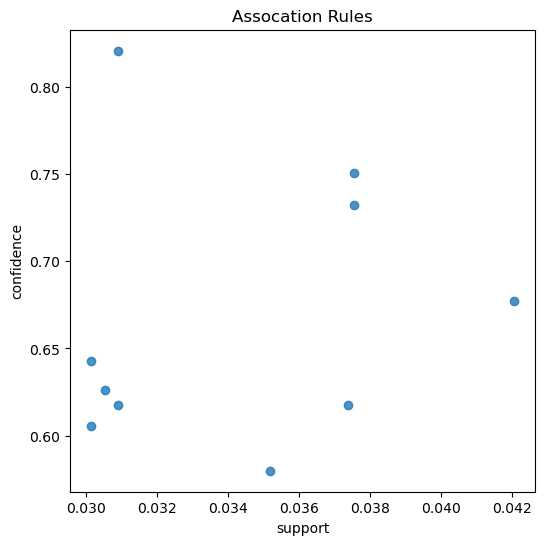

In [33]:
plt.figure(figsize=(6,6))
plt.title('Assocation Rules')
plt.xlabel('support')
plt.ylabel('confidence')
sns.regplot(x=support,y=confidence, fit_reg=False)

## Kết luận: Hai thuật toán cho ra kết quả giống nhau